# Altro

In [44]:
'''delta_z = z_max - z_min #uguale

delta_r = (delta_z * c) / H0 #uguale

V = (1/3) * (Omega * delta_r**3) #uguale

r_cyl = 0.5
h_cyl = 2000 / H0
cyl_vol = np.pi * (r_cyl**2) * h_cyl #uguale

n_density_mean = N / V * cyl_vol

print ('n_density_mean =', n_density_mean)

sigma_mean = n_density_mean / (np.pi * r_cyl**2)

print ('sigma_mean =', sigma_mean)'''

"delta_z = z_max - z_min #uguale\n\ndelta_r = (delta_z * c) / H0 #uguale\n\nV = (1/3) * (Omega * delta_r**3) #uguale\n\nr_cyl = 0.5\nh_cyl = 2000 / H0\ncyl_vol = np.pi * (r_cyl**2) * h_cyl #uguale\n\nn_density_mean = N / V * cyl_vol\n\nprint ('n_density_mean =', n_density_mean)\n\nsigma_mean = n_density_mean / (np.pi * r_cyl**2)\n\nprint ('sigma_mean =', sigma_mean)"

# Intro

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#from astropy.coordinates import Polygon
H_0 = 70 # km/s/Mpc
c = 3 * 10**5 # km/s

In [46]:
sdss = fits.open('SDSS_EnvCatalogue.fits')
data = sdss[1].data
header = sdss[1].header
print (header)
print (sdss[1].columns)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional table                            NAXIS1  =                  104 / width of table in bytes                        NAXIS2  =                19344 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group                                 TFIELDS =                   18 / number of columns                              EXTNAME = 'Joined  '           / table name                                     TTYPE1  = 'OBJID   '           / label for column 1                             TFORM1  = 'K       '           / format for column 1                            TTYPE2  = 'Ra      '           / label for column 2                             TFORM2  = 'D       '           / format 

# Part 1

## Task 1

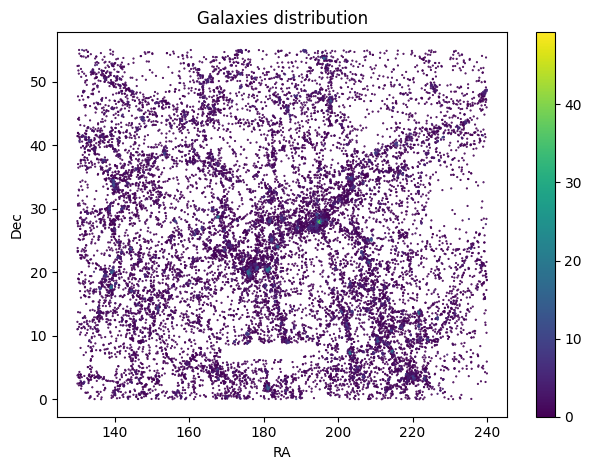

In [47]:
RA = data['RA']
Dec = data['Dec']
dens = data['dens_05']

plt.scatter (RA, Dec, s=0.3, c=dens, alpha=1)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('Galaxies distribution')
plt.tight_layout()
plt.colorbar()
plt.show()

In [48]:
z = data['redshift']

z_min = np.min(z)
z_max = np.max(z)

N = len(RA)

A = np.radians (min(RA))
B = np.radians (max(RA))
C = np.radians (min(Dec))
D = np.radians (max(Dec))

Omega = (np.sin(D)-np.sin(C)) * (B-A)

#den = Omega * ((z_max*c)/H_0)

#mean_density = N / den

print ('Omega =', Omega)
#print ('mean density =', mean_density)

Omega = 1.5720199028463313


In [49]:
z = data['redshift']

z_min = np.min(z)
z_max = np.max(z)

r_min = (z_min * c) / H_0
r_max = (z_max * c) / H_0

V = (1/3) * (Omega * r_max**3) - (1/3) * (Omega * r_min**3)

print ('V', V)

r_cyl = 0.5
h_cyl = 2000 / H_0
cyl_vol = np.pi * (r_cyl**2) * h_cyl

n_density_mean = (N / V) * cyl_vol

print ('n_density_mean =', n_density_mean) #mean of number density galaxies over the cylinders

sigma_mean = n_density_mean / (np.pi * r_cyl**2)

print ('sigma_mean =', sigma_mean) #mean of surface density galaxies over the cylinders

V 974369.4033392225
n_density_mean = 0.4454966909350748
sigma_mean = 0.5672240039471962


In [50]:
delta = dens / sigma_mean
print (np.mean (delta))

3.757822973103572


## Task 2

In [51]:
log_delta = np.log10(1 + delta)
print (log_delta)
print (np.max(log_delta))


[0.         0.6113454  1.09185919 ... 0.         0.78179432 1.13258749]
1.9434673286015451


In [52]:
bin1 = np.where (log_delta == 0.)
group2 = np.where (log_delta > 0.)
print (len(bin1[0]), 'galaxies with 0 overdensity')
print (len(group2[0]), 'galaxies with >0 overdensity')

pos_delta = log_delta[group2] #overdensity >0
perc_edges = np.percentile(pos_delta,  np.linspace (0, 100, 4))

bin2 = np.where ((pos_delta >= perc_edges[0]) & (pos_delta < perc_edges[1]))
bin3 = np.where ((pos_delta >= perc_edges[1]) & (pos_delta < perc_edges[2]))
bin4 = np.where ((pos_delta >= perc_edges[2]) & (pos_delta < perc_edges[3]))

delta_bins = [0., 0.01, perc_edges[0], perc_edges[1], perc_edges[2], perc_edges[3]]


10643 galaxies with 0 overdensity
8701 galaxies with >0 overdensity


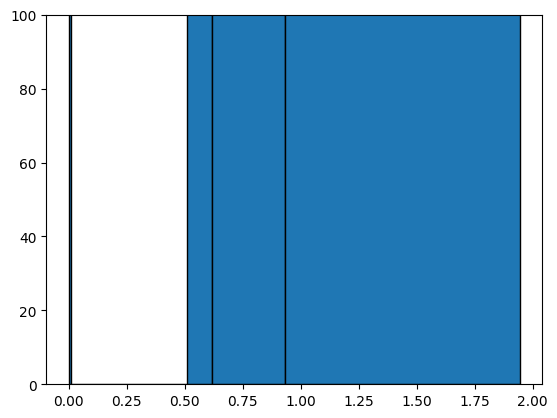

In [53]:
plt.hist (log_delta, bins = delta_bins, edgecolor = 'black')
plt.ylim (0, 100)
plt.show()

In [54]:
mass = data['mass']

u = data['up']
g = data['gp']

col_ug = u - g

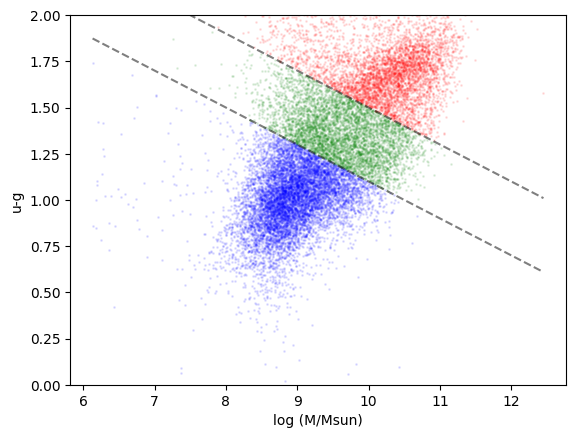

In [55]:
q1 = 3.5
q2 = 3.1
m = -0.2
x = np.linspace (min(mass), max(mass), 10)

def func (x, q, m):
    return q + x*m

blue_cloud = np.where (col_ug < func(mass, q2, m))
red_sequence = np.where (col_ug > func(mass, q1, m))
green_valley = np.where ((col_ug > func(mass, q2, m)) & (col_ug < func(mass, q1, m)))

#plt.scatter (mass, col_ug, s=1, alpha=0.1, c='black')
plt.plot (x, func(x, q1, m), c='black', linestyle = 'dashed', alpha = 0.5)
plt.plot (x, func(x, q2, m), c='black', linestyle = 'dashed', alpha = 0.5)
plt.scatter (mass[blue_cloud], col_ug[blue_cloud], s=1, alpha=0.1, c='blue')
plt.scatter (mass[red_sequence], col_ug[red_sequence], s=1, alpha=0.1, c='red')
plt.scatter (mass[green_valley], col_ug[green_valley], s=1, alpha=0.1, c='green')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

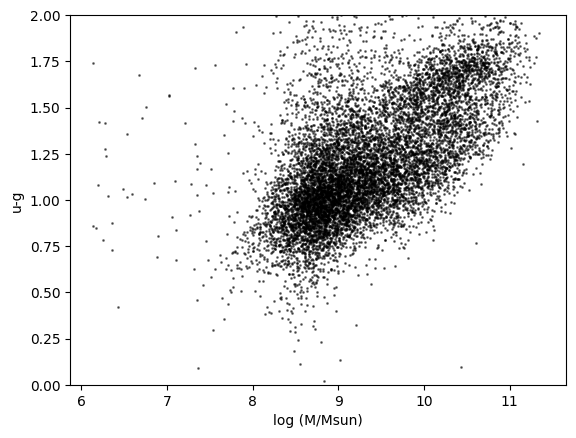

In [56]:
plt.scatter (mass [bin1], col_ug [bin1], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

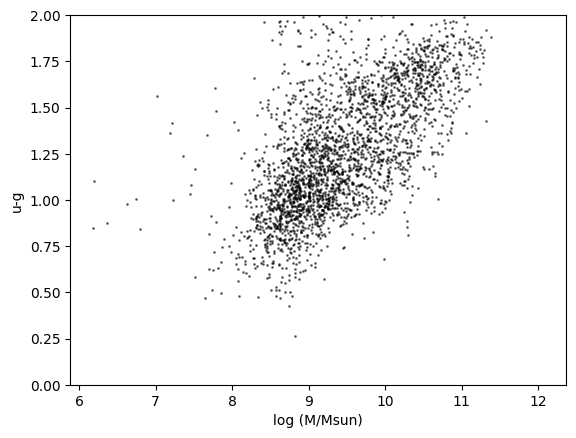

In [57]:
plt.scatter (mass [bin2], col_ug [bin2], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

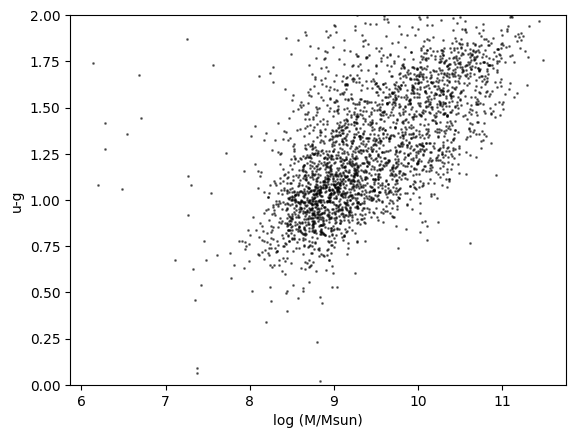

In [58]:
plt.scatter (mass [bin3], col_ug [bin3], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

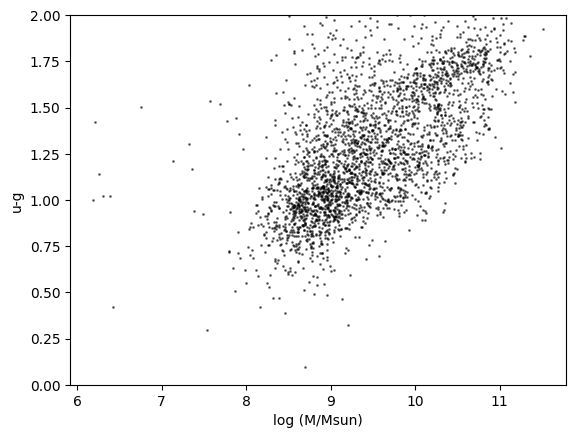

In [59]:
plt.scatter (mass [bin4], col_ug [bin4], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

## Task 3

In [60]:
#FARE ISTOGRAMMA

blue_iso = np.intersect1d (blue_cloud, bin1)
red_iso = np.intersect1d (red_sequence, bin1)
green_iso = np.intersect1d (green_valley, bin1)

print ('ISOLATED GALAXIES')
print (100*len(blue_iso)/len(bin1[0]), 'blue galaxies')
print (100*len(red_iso)/len(bin1[0]), 'red galaxies')
print (100*len(green_iso)/len(bin1[0]), 'green galaxies')
print ('\n')

blue_low = np.intersect1d (blue_cloud, bin2)
red_low = np.intersect1d (red_sequence, bin2)
green_low = np.intersect1d (green_valley, bin2)

print ('LOW DENSITY GALAXIES')
print (100*len(blue_low)/len(bin2[0]), 'blue galaxies')
print (100*len(red_low)/len(bin2[0]), 'red galaxies')
print (100*len(green_low)/len(bin2[0]), 'green galaxies')
print ('\n')

blue_med = np.intersect1d (blue_cloud, bin3)
red_med = np.intersect1d (red_sequence, bin3)
green_med = np.intersect1d (green_valley, bin3)

print ('MEDIUM DENSITY GALAXIES')
print (100*len(blue_med)/len(bin3[0]), 'blue galaxies')
print (100*len(red_med)/len(bin3[0]), 'red galaxies')
print (100*len(green_med)/len(bin3[0]), 'green galaxies')
print ('\n')

blue_high = np.intersect1d (blue_cloud, bin4)
red_high = np.intersect1d (red_sequence, bin4)
green_high = np.intersect1d (green_valley, bin4)

print ('HIGH DENSITY GALAXIES')
print (100*len(blue_high)/len(bin4[0]), 'blue galaxies')
print (100*len(red_high)/len(bin4[0]), 'red galaxies')
print (100*len(green_high)/len(bin4[0]), 'green galaxies')
print ('\n')


ISOLATED GALAXIES
56.158977731842526 blue galaxies
20.52992577280842 red galaxies
23.311096495349055 green galaxies


LOW DENSITY GALAXIES
47.99721351445489 blue galaxies
27.83002438174852 red galaxies
24.172762103796586 green galaxies


MEDIUM DENSITY GALAXIES
48.122866894197955 blue galaxies
26.757679180887372 red galaxies
25.119453924914676 green galaxies


HIGH DENSITY GALAXIES
45.98137288720248 blue galaxies
27.69920662297344 red galaxies
26.319420489824076 green galaxies




# Part 2

In [88]:
spec2 = fits.open('Spec_N4330_region3 (1).fits')
spec2flx = spec2[0].data
spec2err = spec2[1].data
spec2wav = spec2[2].data

print (spec2flx.shape)
print (spec2err.shape)
print (spec2wav.shape)


table = fits.open('Phot_N4330 (1).fits')
tabdata = table[1].data

print (tabdata.columns)

(2400,)
(2400,)
(2400,)
ColDefs(
    name = 'id'; format = 'K'; null = -9223372036854775808
    name = 'z_best'; format = 'D'
    name = 'dl'; format = 'D'
    name = 'f_FUV'; format = 'D'
    name = 'e_FUV'; format = 'D'
    name = 'f_NUV'; format = 'D'
    name = 'e_NUV'; format = 'D'
    name = 'f_U'; format = 'D'
    name = 'e_U'; format = 'D'
    name = 'f_G'; format = 'D'
    name = 'e_G'; format = 'D'
    name = 'f_I'; format = 'D'
    name = 'e_I'; format = 'D'
    name = 'f_Z'; format = 'D'
    name = 'e_Z'; format = 'D'
    name = 'f_IRAC1'; format = 'D'
    name = 'e_IRAC1'; format = 'D'
    name = 'f_IRAC4'; format = 'D'
    name = 'e_IRAC4'; format = 'D'
    name = 'f_PACS100'; format = 'D'
    name = 'e_PACS100'; format = 'D'
)


In [89]:
mean_flux = np.mean(spec2flx)

#Read model
modhdu = fits.open('Models_N4330_region3 (1).fits')
#How many extensions
Next = modhdu[0].header['NEXT']
modwave = modhdu[0].data
chi2 = np.zeros (Next)
consts = np.zeros (Next)
for ext in np.arange(1,Next+1):
    thisext = modhdu[ext]
    thishead = thisext.header
    modspec = thisext.data
    Qtau = thishead['TRUNCTAU']
    Qage = thishead['TRUNCAGE']
    photarr = np.array((thishead['MODFUV'],thishead['MODNUV'],\
    thishead['MODU'],thishead['MODG'],\
    thishead['MODI'],thishead['MODZ'], \
    thishead['MODIR1'],thishead['MODIR4']))

    mean_mod = np.mean(modspec.flatten())

    const = mean_flux / mean_mod
    consts[ext-1] = const
    modspec2 = modspec * const

    chi2[ext-1] = np.sum((spec2flx - modspec2)**2 / (spec2err**2))

## Task 1

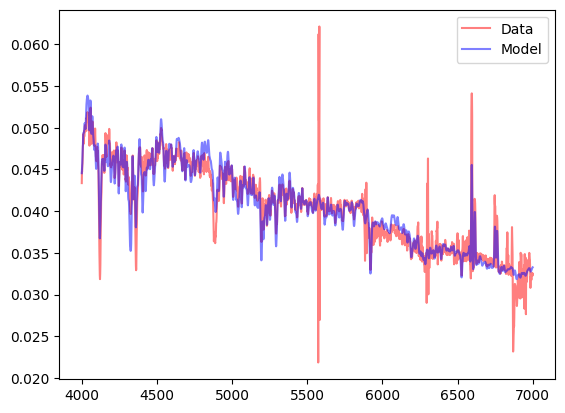

In [90]:
plt.plot (spec2wav, spec2flx, c='red', alpha=0.5, label='Data')
plt.plot (modwave.flatten(), modspec2.flatten(), c='blue', alpha=0.5, label='Model')
plt.legend()
plt.show()

## Task 2

In [91]:
print (chi2)

best = np.where(chi2 == np.min(chi2))[0][0]

print (best)

[  4846.95736053   2718.88909724   3819.72928443   4539.34591834
   4843.70923234   4983.64951829   4966.81458544   4974.04906181
   5040.76152247   5339.34191872   5681.01475128  39284.42249756
  12668.42904318   4466.50564483   2669.62560494   2786.4642128
   3845.4181342    4782.40898015   4939.06014349   5016.77263715
   5308.0262062    5651.83871726  82093.7683333   40952.85828069
  19005.57003049   8582.59974045   4249.99366812   2643.51439998
   4009.52504108   4687.77282702   4930.26679612   5272.37863895
   5620.28976426 113675.08763587  71183.50083219  42337.74660361
  24059.79290434  13248.97473073   4329.49591105   2992.53496383
   4113.02618363   4685.87206964   5219.76051304   5584.71293938
 135656.75185977  95995.60771281  65699.34807489  43507.40228301
  27951.54485255  10850.29315714   2797.69739658   3295.55767649
   4205.27958202   5129.62171852   5542.5955817  150426.2782212
 114235.80113564  84900.35949338  61719.46679906  43915.55671877
  21025.53774555   4747.589

In [92]:
best_ext = modhdu[best + 1]
best_Qage = best_ext.header["TRUNCAGE"]
best_Qtau = best_ext.header["TRUNCTAU"]

print ('Best Q age', best_Qage, 'Myr')
print ('Best Q tau', best_Qtau)


Best Q age 200 Myr
Best Q tau 60


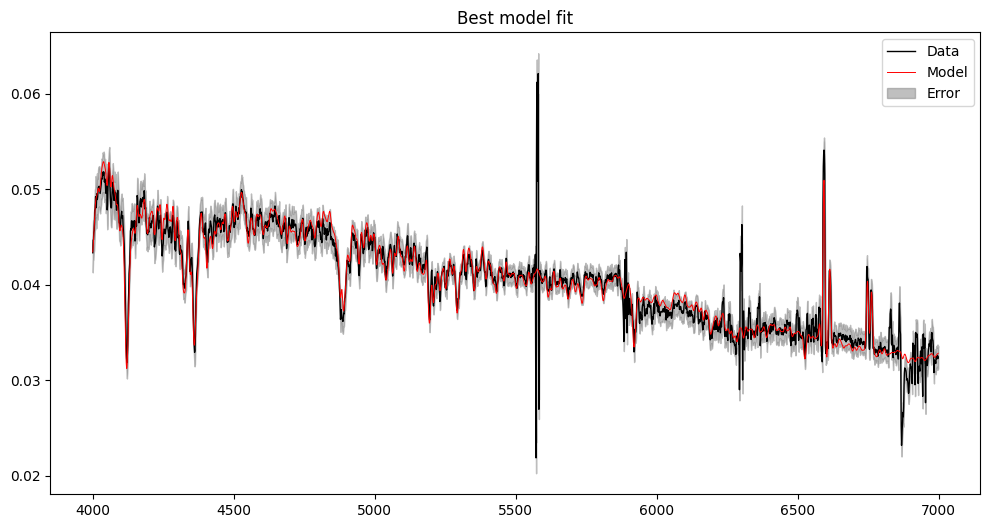

In [93]:
best_spec = best_ext.data
plt.figure(figsize=(12,6))
plt.plot (spec2wav, spec2flx, c='black', alpha=1, label='Data', linewidth=1)
plt.plot (modwave.flatten(), consts[best]*best_spec.flatten(), c='red', alpha=1, label='Model', linewidth=0.7)
#plt.plot (spec2wav, spec2flx+spec2err, c='gray', alpha=1, linewidth=0.7)
#plt.plot (spec2wav, spec2flx-spec2err, c='gray', alpha=1, linewidth=0.7)
plt.fill_between (spec2wav, spec2flx-spec2err, spec2flx+spec2err, color='gray', alpha=0.5, label='Error')
plt.title ('Best model fit')
plt.legend()
plt.show()

In [94]:
print (f" Reduced chi2: {chi2.min()/len(spec2flx):.3f}")

 Reduced chi2: 1.101


# Task 3

In [95]:
print (tabdata.columns)

ColDefs(
    name = 'id'; format = 'K'; null = -9223372036854775808
    name = 'z_best'; format = 'D'
    name = 'dl'; format = 'D'
    name = 'f_FUV'; format = 'D'
    name = 'e_FUV'; format = 'D'
    name = 'f_NUV'; format = 'D'
    name = 'e_NUV'; format = 'D'
    name = 'f_U'; format = 'D'
    name = 'e_U'; format = 'D'
    name = 'f_G'; format = 'D'
    name = 'e_G'; format = 'D'
    name = 'f_I'; format = 'D'
    name = 'e_I'; format = 'D'
    name = 'f_Z'; format = 'D'
    name = 'e_Z'; format = 'D'
    name = 'f_IRAC1'; format = 'D'
    name = 'e_IRAC1'; format = 'D'
    name = 'f_IRAC4'; format = 'D'
    name = 'e_IRAC4'; format = 'D'
    name = 'f_PACS100'; format = 'D'
    name = 'e_PACS100'; format = 'D'
)


In [96]:
phot_tab2 = tabdata [2]
print (phot_tab2)

phot2 = np.zeros (8)
phot2_err = np.zeros (8)

for i in range (len(phot2)):
    phot2[i] = phot_tab2[3+(2*i)]
    phot2_err[i] = phot_tab2[4+(2*i)]
print (phot2)
print (phot2_err)

(3, 0.004670558, 16.5, 0.1229, 0.006, 0.188, 0.009, 0.845, 0.055, 1.96, 0.065, 3.567, 0.11, 4.287, 0.148, 2.452, 0.052, 3.079, 0.085, 59.4, 12.41)
[0.1229 0.188  0.845  1.96   3.567  4.287  2.452  3.079 ]
[0.006 0.009 0.055 0.065 0.11  0.148 0.052 0.085]


In [97]:
chi2_phot = np.zeros(Next)

for ext in np.arange(1,Next+1):
    thisext = modhdu[ext]
    thishead = thisext.header
    modspec = thisext.data
    photarr = np.array((thishead['MODFUV'],thishead['MODNUV'],\
    thishead['MODU'],thishead['MODG'],\
    thishead['MODI'],thishead['MODZ'], \
    thishead['MODIR1'],thishead['MODIR4']))

    chi2_phot[ext-1] = np.sum((photarr - phot2)**2 / (phot2_err**2))

In [98]:
print (chi2_phot/8)

ind_min = np.argmin(chi2_phot/8)

print ((chi2_phot/8)[ind_min])

print (ind_min)

[2.63714959e+02 4.05819012e+01 2.97326624e+00 7.33849848e+00
 2.13670290e+01 5.16948614e+01 9.94429426e+01 1.30691914e+02
 1.52649078e+02 1.91165952e+02 2.19649006e+02 9.60504874e+02
 3.07205806e+02 8.14540331e+01 1.20735093e+01 6.80025105e-01
 2.60476882e+01 8.59610826e+01 1.23395407e+02 1.47883845e+02
 1.88351533e+02 2.17448403e+02 1.77190355e+03 7.89681666e+02
 3.23644096e+02 1.14135570e+02 2.88598713e+01 3.01568332e+00
 6.32909346e+01 1.11268792e+02 1.41038150e+02 1.85220008e+02
 2.15150620e+02 2.44507507e+03 1.32765755e+03 6.85257675e+02
 3.29742451e+02 1.41801835e+02 1.10957233e+01 3.49150826e+01
 9.24325842e+01 1.30425109e+02 1.81430941e+02 2.12690111e+02
 2.96883479e+03 1.82190986e+03 1.07972536e+03 6.13703102e+02
 3.29489527e+02 6.99728176e+01 1.11917500e+01 6.73072033e+01
 1.14431962e+02 1.76480491e+02 2.09977770e+02 3.35036335e+03
 2.22328273e+03 1.43856745e+03 9.05499605e+02 5.50777443e+02
 1.74521266e+02 4.53082687e+00 3.95360331e+01 9.11378466e+01
 1.68231133e+02 2.063904

150 40


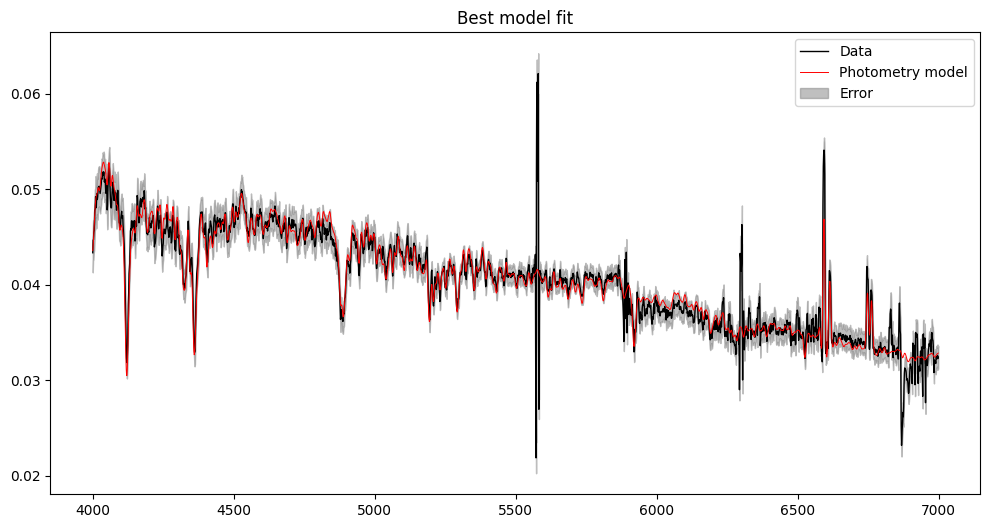

In [99]:
best_ext_phot = modhdu[ind_min+1]

Qage_phot = best_ext_phot.header['TRUNCAGE']
Qtau_phot = best_ext_phot.header['TRUNCTAU']

print (Qage_phot, Qtau_phot)

best_spec_phot = best_ext_phot.data
plt.figure(figsize=(12,6))
plt.plot (spec2wav, spec2flx, c='black', alpha=1, label='Data', linewidth=1)
plt.plot (modwave.flatten(), consts[ind_min]*best_spec_phot.flatten(), c='red', alpha=1, label='Photometry model', linewidth=0.7)
#plt.plot (spec2wav, spec2flx+spec2err, c='gray', alpha=1, linewidth=0.7)
#plt.plot (spec2wav, spec2flx-spec2err, c='gray', alpha=1, linewidth=0.7)
plt.fill_between (spec2wav, spec2flx-spec2err, spec2flx+spec2err, color='gray', alpha=0.5, label='Error')
plt.title ('Best model fit')
plt.legend()
plt.show()

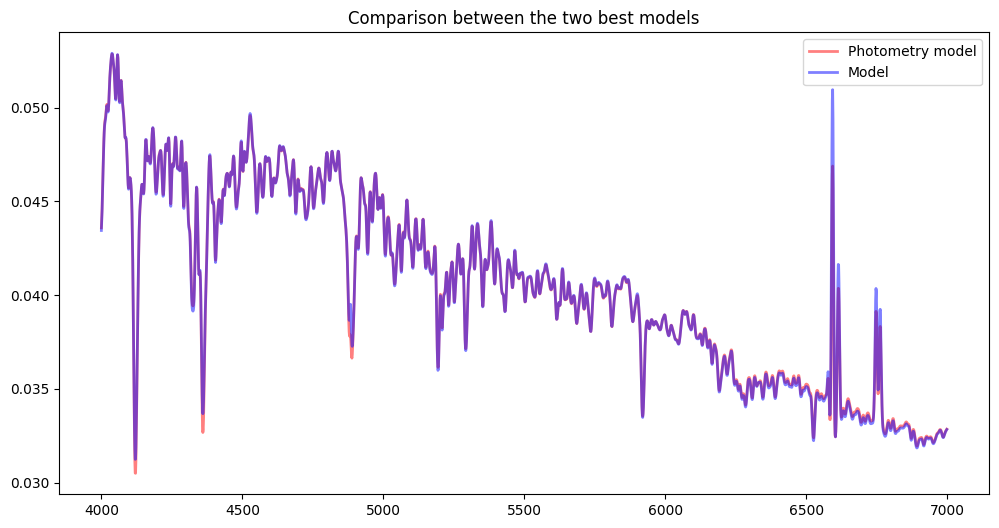

In [100]:
plt.figure(figsize=(12,6))
plt.plot (modwave.flatten(), consts[ind_min]*best_spec_phot.flatten(), c='red', alpha=0.5, label='Photometry model', linewidth=2)
plt.plot (modwave.flatten(), consts[best]*best_spec.flatten(), c='blue', alpha=0.5, label='Model', linewidth=2)
plt.title ('Comparison between the two best models')
plt.legend()
plt.show()